# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
gas = pd.read_csv("measurements.csv", decimal=',')
print(gas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB
None


# Data Management

In [3]:
# Handling missing values
# Drop 'refill liters' and 'refill gas' due to high null cound
gas.drop(['refill liters', 'refill gas'], axis=1, inplace=True)

# Impute missing values in 'temp_inside' with the mean
gas['temp_inside'].fillna(gas['temp_inside'].mean(), inplace=True)

# Encoding categorical variables
data = pd.get_dummies(gas, columns=['gas_type', 'specials'])

# Summary statistics
print(data.describe())

# Correlation matrix
print(data.corr())


         distance     consume       speed  temp_inside  temp_outside  \
count  388.000000  388.000000  388.000000   388.000000    388.000000   
mean    19.652835    4.912371   41.927835    21.929521     11.358247   
std     22.667837    1.033172   13.598524     0.994666      6.991542   
min      1.300000    3.300000   14.000000    19.000000     -5.000000   
25%     11.800000    4.300000   32.750000    21.500000      7.000000   
50%     14.600000    4.700000   40.500000    22.000000     10.000000   
75%     19.000000    5.300000   50.000000    22.500000     16.000000   
max    216.100000   12.200000   90.000000    25.500000     31.000000   

               AC        rain         sun  
count  388.000000  388.000000  388.000000  
mean     0.077320    0.123711    0.082474  
std      0.267443    0.329677    0.275441  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  

# Data Visualization

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


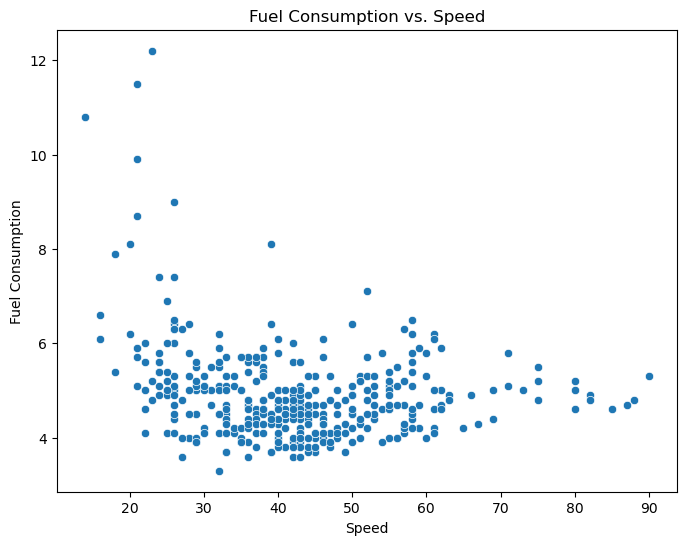

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


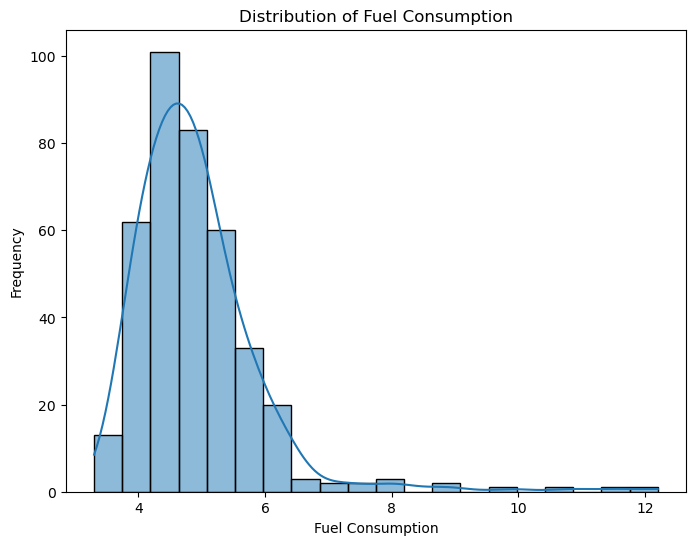

/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/slevin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


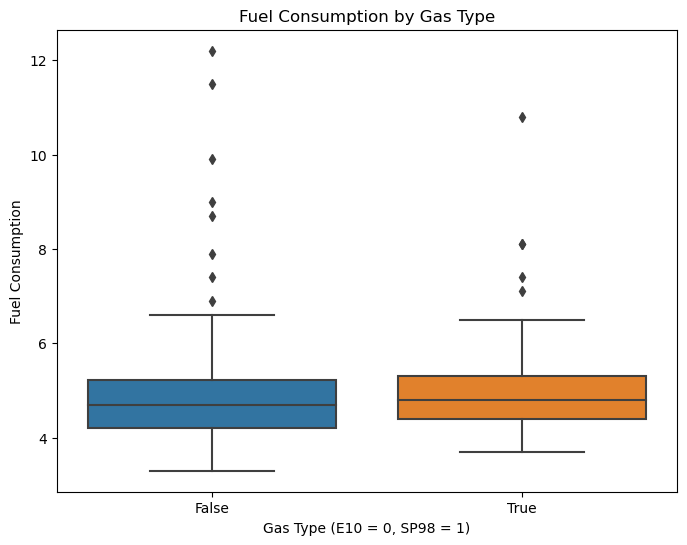

In [4]:
# Scatter plot: Consumption vs. Speed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='speed', y='consume', data=data)
plt.title('Fuel Consumption vs. Speed')
plt.xlabel('Speed')
plt.ylabel('Fuel Consumption')
plt.show()

# Histogram: Distribution of Consumption
plt.figure(figsize=(8, 6))
sns.histplot(data['consume'], bins=20, kde=True)
plt.title('Distribution of Fuel Consumption')
plt.xlabel('Fuel Consumption')
plt.ylabel('Frequency')
plt.show()

# Box plot: Consumption vs. Gas Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='gas_type_E10', y='consume', data=data)
plt.title('Fuel Consumption by Gas Type')
plt.xlabel('Gas Type (E10 = 0, SP98 = 1)')
plt.ylabel('Fuel Consumption')
plt.show()

# Machine Learning Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection and split
features = ['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'gas_type_E10', 'gas_type_SP98']
X = data[features]
y = data['consume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.8216359860810033
R^2 Score: 0.0944224528189378


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [6]:
new_trip = [[20, 60, 22, 15, 0, 0, 1, 1, 0]]  # Example data for distance, speed, temp_inside, temp_outside, AC, rain, sun, gas_type_E10, gas_type_SP98
predicted_consumption = model.predict(new_trip)
print(f"Predicted fuel consumption: {predicted_consumption[0]}")

Predicted fuel consumption: 4.26987685029525


/Users/slevin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
